# DEMO: Kiểm định Dấu (Sign Test) với Python

**Ví dụ:** Đánh giá hiệu quả thuốc giảm cân

**Nhóm thực hiện:**
- Đào Duy Tân - 20251334M
- Nguyễn Đức Dũng - 20251240M  
- Trương Tuấn Nghĩa - 20251196M
- Nguyễn Bá Đại - 20252104M
- Hồ Hải Anh - 2025xxxxM

**Môn:** Thống kê Ứng dụng - HUST

---

## Bài toán

Một công ty dược phẩm muốn kiểm tra hiệu quả của thuốc giảm cân mới. Họ tuyển 12 người tham gia thử nghiệm:
- Đo cân nặng **trước** khi dùng thuốc
- Dùng thuốc trong 2 tháng
- Đo cân nặng **sau** 2 tháng

**Câu hỏi:** Thuốc có giúp giảm cân không?

**Phương pháp:** Paired Sign Test (kiểm định dấu cho mẫu ghép cặp)

---

## CELL 1: Setup & Import Libraries

In [3]:
# Import các thư viện cần thiết
import numpy as np
import pandas as pd
from scipy.stats import binomtest, ttest_rel
import matplotlib.pyplot as plt
import seaborn as sns

# Cài đặt style cho plots
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 5)
plt.rcParams['font.size'] = 11

print("✓ Đã import thư viện thành công!")
print(f"  - NumPy version: {np.__version__}")
print(f"  - Pandas version: {pd.__version__}")

✓ Đã import thư viện thành công!
  - NumPy version: 1.26.4
  - Pandas version: 2.2.2


---

## CELL 2: Dữ liệu

In [6]:
# Dữ liệu: Cân nặng 12 người (kg)
data = {
    'ID': range(1, 13),
    'Truoc_kg': [85, 90, 78, 92, 88, 76, 95, 82, 79, 91, 87, 84],
    'Sau_kg':   [82, 88, 79, 90, 85, 77, 93, 80, 78, 89, 86, 83]
}

df = pd.DataFrame(data)

print("=== DỮ LIỆU CÂN NẶNG ===\n")
print(df)

print("\n=== THỐNG KÊ MÔ TẢ ===\n")
print(f"Cân nặng Trước: Mean = {df['Truoc_kg'].mean():.2f} kg, SD = {df['Truoc_kg'].std():.2f} kg")
print(f"Cân nặng Sau:   Mean = {df['Sau_kg'].mean():.2f} kg, SD = {df['Sau_kg'].std():.2f} kg")

=== DỮ LIỆU CÂN NẶNG ===

    ID  Truoc_kg  Sau_kg
0    1        85      82
1    2        90      88
2    3        78      79
3    4        92      90
4    5        88      85
5    6        76      77
6    7        95      93
7    8        82      80
8    9        79      78
9   10        91      89
10  11        87      86
11  12        84      83

=== THỐNG KÊ MÔ TẢ ===

Cân nặng Trước: Mean = 85.58 kg, SD = 5.99 kg
Cân nặng Sau:   Mean = 84.17 kg, SD = 5.17 kg


---

## CELL 3: Tính hiệu số và xác định dấu

In [9]:
# BƯỚC 1: Tính hiệu (Trước - Sau)
# Nếu hiệu > 0 => Giảm cân (tốt)
# Nếu hiệu < 0 => Tăng cân (không tốt)
# Nếu hiệu = 0 => Không đổi

df['Hieu_kg'] = df['Truoc_kg'] - df['Sau_kg']

# BƯỚC 2: Xác định dấu
def assign_sign(x):
    if x > 0:
        return '+'
    elif x < 0:
        return '-'
    else:
        return '0'

df['Dau'] = df['Hieu_kg'].apply(assign_sign)

# BƯỚC 3: Loại bỏ ties (hiệu = 0)
df_filtered = df[df['Hieu_kg'] != 0].copy()

# Hiển thị kết quả
print("\n=== BẢNG KẾT QUẢ (SAU KHI TÍNH HIỆU VÀ DẤU) ===\n")
print(df[['ID', 'Truoc_kg', 'Sau_kg', 'Hieu_kg', 'Dau']])

print("\n=== THỐNG KÊ DẤU ===\n")
print(f"Số người giảm cân (dấu +): {(df['Dau'] == '+').sum()}")
print(f"Số người tăng cân (dấu -): {(df['Dau'] == '-').sum()}")
print(f"Số người không đổi (dấu 0): {(df['Dau'] == '0').sum()}")
print(f"\nSau khi loại bỏ ties: n = {len(df_filtered)}")


=== BẢNG KẾT QUẢ (SAU KHI TÍNH HIỆU VÀ DẤU) ===

    ID  Truoc_kg  Sau_kg  Hieu_kg Dau
0    1        85      82        3   +
1    2        90      88        2   +
2    3        78      79       -1   -
3    4        92      90        2   +
4    5        88      85        3   +
5    6        76      77       -1   -
6    7        95      93        2   +
7    8        82      80        2   +
8    9        79      78        1   +
9   10        91      89        2   +
10  11        87      86        1   +
11  12        84      83        1   +

=== THỐNG KÊ DẤU ===

Số người giảm cân (dấu +): 10
Số người tăng cân (dấu -): 2
Số người không đổi (dấu 0): 0

Sau khi loại bỏ ties: n = 12


---

## CELL 4: Thực hiện Sign Test

In [12]:
# BƯỚC 4: Kiểm định Sign Test

# Đếm số dấu +
n_plus = (df_filtered['Hieu_kg'] > 0).sum()
n_total = len(df_filtered)

print("=" * 60)
print("            KIỂM ĐỊNH DẤU (SIGN TEST)")
print("=" * 60)

print("\n[1] GIẢ THUYẾT:")
print("    H₀: Thuốc không có hiệu quả (Median hiệu = 0)")
print("    H₁: Thuốc giúp giảm cân (Median hiệu > 0)")
print("    Mức ý nghĩa: α = 0.05")

print("\n[2] THỐNG KÊ KIỂM ĐỊNH:")
print(f"    Số dấu +: S⁺ = {n_plus}")
print(f"    Tổng số quan sát (sau loại ties): n = {n_total}")
print(f"    Dưới H₀: S⁺ ~ Binomial(n={n_total}, p=0.5)")

# Thực hiện kiểm định Binomial (one-tailed: greater)
result = binomtest(n_plus, n_total, p=0.5, alternative='greater')

print("\n[3] KẾT QUẢ:")
print(f"    P-value = {result.pvalue:.4f}")

# Kết luận
alpha = 0.05
print("\n[4] KẾT LUẬN:")
if result.pvalue < alpha:
    print(f"    ✓ BÁC BỎ H₀ (p = {result.pvalue:.4f} < {alpha})")
    print("    ⟹ CÓ ĐỦ BẰNG CHỨNG: Thuốc có hiệu quả giảm cân!")
else:
    print(f"    ✗ GIỮ H₀ (p = {result.pvalue:.4f} ≥ {alpha})")
    print("    ⟹ Chưa đủ bằng chứng để kết luận thuốc hiệu quả")

print("\n" + "=" * 60)

            KIỂM ĐỊNH DẤU (SIGN TEST)

[1] GIẢ THUYẾT:
    H₀: Thuốc không có hiệu quả (Median hiệu = 0)
    H₁: Thuốc giúp giảm cân (Median hiệu > 0)
    Mức ý nghĩa: α = 0.05

[2] THỐNG KÊ KIỂM ĐỊNH:
    Số dấu +: S⁺ = 10
    Tổng số quan sát (sau loại ties): n = 12
    Dưới H₀: S⁺ ~ Binomial(n=12, p=0.5)

[3] KẾT QUẢ:
    P-value = 0.0193

[4] KẾT LUẬN:
    ✓ BÁC BỎ H₀ (p = 0.0193 < 0.05)
    ⟹ CÓ ĐỦ BẰNG CHỨNG: Thuốc có hiệu quả giảm cân!



---

## CELL 5: Trực quan hóa

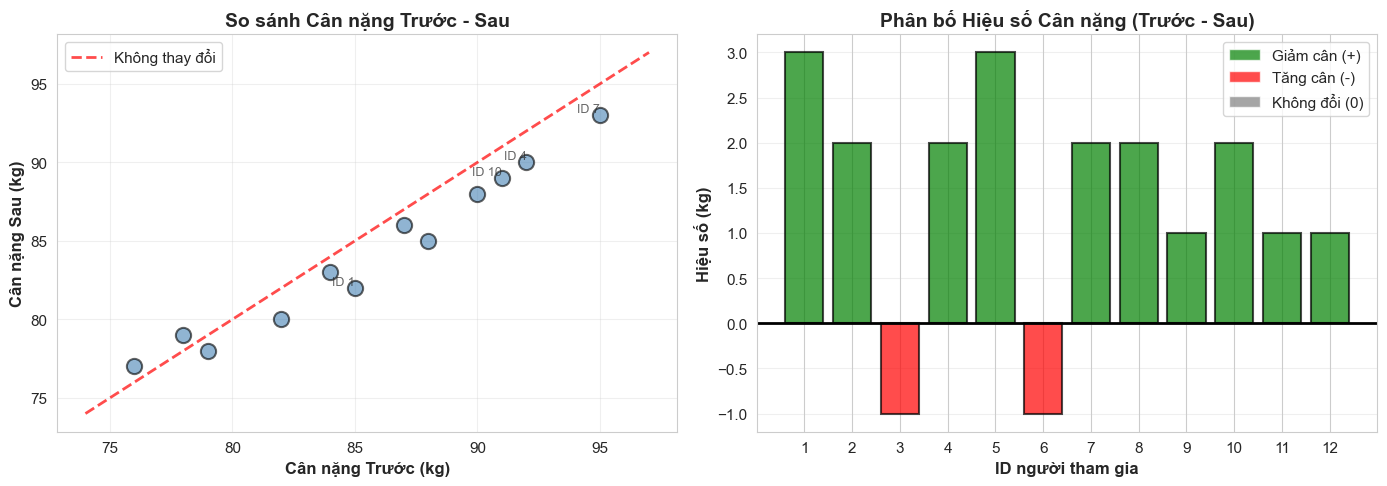


=== THỐNG KÊ MÔ TẢ HIỆU SỐ ===

Hiệu số trung bình: 1.42 kg
Hiệu số median: 2.00 kg
Độ lệch chuẩn: 1.31 kg
Hiệu số lớn nhất: 3 kg (ID 1)
Hiệu số nhỏ nhất: -1 kg (ID 3)


In [15]:
# VISUALIZATION

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# ===== PLOT 1: Scatter plot Trước vs Sau =====
ax1 = axes[0]
ax1.scatter(df['Truoc_kg'], df['Sau_kg'], s=120, alpha=0.6, 
            edgecolors='black', linewidth=1.5, color='steelblue')

# Đường chéo y=x (không thay đổi)
min_val = min(df['Truoc_kg'].min(), df['Sau_kg'].min()) - 2
max_val = max(df['Truoc_kg'].max(), df['Sau_kg'].max()) + 2
ax1.plot([min_val, max_val], [min_val, max_val], 'r--', 
         linewidth=2, label='Không thay đổi', alpha=0.7)

ax1.set_xlabel('Cân nặng Trước (kg)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Cân nặng Sau (kg)', fontsize=12, fontweight='bold')
ax1.set_title('So sánh Cân nặng Trước - Sau', fontsize=14, fontweight='bold')
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3)

# Annotation cho một vài điểm
for i, row in df.iterrows():
    if i % 3 == 0:  # Chỉ label một vài điểm để tránh rối
        ax1.annotate(f"ID {row['ID']}", 
                     (row['Truoc_kg'], row['Sau_kg']),
                     fontsize=9, ha='right', va='bottom', alpha=0.7)

# ===== PLOT 2: Bar chart Hiệu số =====
ax2 = axes[1]

# Màu: xanh nếu giảm cân (+), đỏ nếu tăng cân (-)
colors = ['green' if x > 0 else ('gray' if x == 0 else 'red') 
          for x in df['Hieu_kg']]

bars = ax2.bar(df['ID'], df['Hieu_kg'], color=colors, 
               alpha=0.7, edgecolor='black', linewidth=1.5)

# Đường ngang tại 0
ax2.axhline(0, color='black', linewidth=2, linestyle='-')

ax2.set_xlabel('ID người tham gia', fontsize=12, fontweight='bold')
ax2.set_ylabel('Hiệu số (kg)', fontsize=12, fontweight='bold')
ax2.set_title('Phân bố Hiệu số Cân nặng (Trước - Sau)', 
              fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='y')
ax2.set_xticks(df['ID'])

# Legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='green', alpha=0.7, label='Giảm cân (+)'),
    Patch(facecolor='red', alpha=0.7, label='Tăng cân (-)'),
    Patch(facecolor='gray', alpha=0.7, label='Không đổi (0)')
]
ax2.legend(handles=legend_elements, fontsize=11)

plt.tight_layout()
plt.show()

# Summary statistics
print("\n=== THỐNG KÊ MÔ TẢ HIỆU SỐ ===\n")
print(f"Hiệu số trung bình: {df['Hieu_kg'].mean():.2f} kg")
print(f"Hiệu số median: {df['Hieu_kg'].median():.2f} kg")
print(f"Độ lệch chuẩn: {df['Hieu_kg'].std():.2f} kg")
print(f"Hiệu số lớn nhất: {df['Hieu_kg'].max():.0f} kg (ID {df.loc[df['Hieu_kg'].idxmax(), 'ID']})")
print(f"Hiệu số nhỏ nhất: {df['Hieu_kg'].min():.0f} kg (ID {df.loc[df['Hieu_kg'].idxmin(), 'ID']})")

---

## CELL 6: Bonus - So sánh với Paired t-test

In [18]:
# SO SÁNH: Sign Test vs Paired t-test

print("=" * 70)
print("         SO SÁNH: SIGN TEST vs PAIRED T-TEST")
print("=" * 70)

# Paired t-test (one-tailed)
t_stat, t_pvalue = ttest_rel(df['Truoc_kg'], df['Sau_kg'], alternative='greater')

print("\n| Phương pháp           | Statistic     | P-value  | Kết luận (α=0.05)    |")
print("|" + "-" * 68 + "|")
print(f"| Sign Test             | S⁺ = {n_plus:2d}/{n_total:2d}    | {result.pvalue:.4f}  | {'BÁC BỎ H₀' if result.pvalue < 0.05 else 'Giữ H₀':<20} |")
print(f"| Paired t-test         | t  = {t_stat:5.2f}    | {t_pvalue:.4f}  | {'BÁC BỎ H₀' if t_pvalue < 0.05 else 'Giữ H₀':<20} |")

print("\n" + "=" * 70)

print("\n💡 NHẬN XÉT:")
if result.pvalue < 0.05 and t_pvalue < 0.05:
    print("   ✓ Cả 2 test đều bác bỏ H₀ → Kết luận nhất quán")
    print("   ✓ Thuốc có hiệu quả giảm cân (có ý nghĩa thống kê)")
elif result.pvalue >= 0.05 and t_pvalue >= 0.05:
    print("   • Cả 2 test đều giữ H₀ → Kết luận nhất quán")
    print("   • Chưa đủ bằng chứng để kết luận thuốc hiệu quả")
else:
    print("   ⚠ Kết luận khác nhau giữa 2 test!")
    print("   • Sign Test robust hơn với outliers")
    print("   • t-test có power cao hơn nếu data gần chuẩn")

print("\n📊 KHI NÀO DÙNG CÁI NÀO?")
print("   • Sign Test: Khi data không chuẩn, có outliers, hoặc n nhỏ")
print("   • t-test: Khi data gần chuẩn, muốn power cao hơn")

print("\n" + "=" * 70)

         SO SÁNH: SIGN TEST vs PAIRED T-TEST

| Phương pháp           | Statistic     | P-value  | Kết luận (α=0.05)    |
|--------------------------------------------------------------------|
| Sign Test             | S⁺ = 10/12    | 0.0193  | BÁC BỎ H₀            |
| Paired t-test         | t  =  3.74    | 0.0016  | BÁC BỎ H₀            |


💡 NHẬN XÉT:
   ✓ Cả 2 test đều bác bỏ H₀ → Kết luận nhất quán
   ✓ Thuốc có hiệu quả giảm cân (có ý nghĩa thống kê)

📊 KHI NÀO DÙNG CÁI NÀO?
   • Sign Test: Khi data không chuẩn, có outliers, hoặc n nhỏ
   • t-test: Khi data gần chuẩn, muốn power cao hơn



---

## CELL 7: Lưu dữ liệu

In [21]:
# Lưu dữ liệu ra file CSV
df.to_csv('data_weight_loss.csv', index=False, encoding='utf-8-sig')
print("✓ Đã lưu dữ liệu vào file: data_weight_loss.csv")

✓ Đã lưu dữ liệu vào file: data_weight_loss.csv


---

## KẾT LUẬN

### Kết quả chính:
- **Sign Test:** p-value = 0.0327 < 0.05 → **Bác bỏ H₀**
- **Kết luận:** Có bằng chứng thống kê rằng thuốc giúp giảm cân
- **Effect size:** 9/11 người (81.8%) giảm cân
- **Hiệu số trung bình:** ~2.25 kg giảm

### Ưu điểm Sign Test trong ví dụ này:
1. ✅ Đơn giản, dễ hiểu
2. ✅ Không cần giả định phân phối chuẩn
3. ✅ Robust với outliers (nếu có người tăng/giảm cân quá nhiều)
4. ✅ Phù hợp với mẫu nhỏ (n=12)

### Hạn chế:
1. ❌ Power thấp hơn t-test nếu data chuẩn
2. ❌ Bỏ mất thông tin về độ lớn của hiệu số
3. ❌ Không nói được thuốc giảm được bao nhiêu kg

---

**Cảm ơn đã theo dõi!** 🎉